<a href="https://colab.research.google.com/github/its-Kumar/Deep_Learning/blob/master/NN_from_scratch/Gradient_descent_all.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Batch, stochastic and mini batch Gradient Descent

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Importing the dataset

In [2]:
df = pd.read_csv('homeprices_banglore.csv')
df

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00
5,1170,2,38.00
6,2732,4,135.00
7,3300,4,155.00
8,1310,3,50.00
9,3700,5,167.00


## Scaling the data

In [3]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price', axis='columns'))
scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [4]:
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0], 1))
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

## Batch Gradient Descent

In [9]:
def batch_gradient_descent(X, y_true, epochs, learning_rate=0.01):
    number_of_features = X.shape[1]

    w = np.ones(shape=(number_of_features))
    b = 0
    cost_list = []
    epoch_list = []
    total_samples = X.shape[0]
    for i in range(epochs):
        y_predicted = np.dot(w, X.T) + b

        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost = np.mean(np.square(y_true-y_predicted))

        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w, b, cost, cost_list, epoch_list
    

In [11]:
w, b, cost, cost_list, epoch_list = batch_gradient_descent(
    scaled_X,
    scaled_y.reshape(scaled_y.shape[0],),
    epochs=500)
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

### Plot

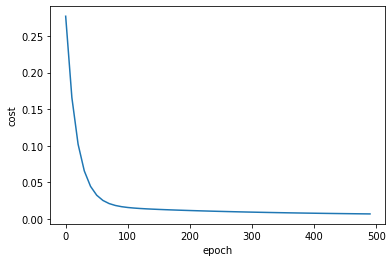

In [12]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list, cost_list)

### Predict

In [15]:
def predict(area, bedrooms, w, b):
    scaled_X = sx.transform([[area, bedrooms]])[0]
    scaled_price = w[0]*scaled_X[0] + w[1]* scaled_X[1] + b
    return sy.inverse_transform([[scaled_price]])[0][0]


predict(2600, 4, w, b)

128.45484403267596

In [16]:
predict(1310, 3, w, b)

63.22421230988588

## Stochastic Gradient Descent

In [21]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate=0.01):
    import random
    number_of_features = X.shape[1]

    w = np.ones(shape=(number_of_features))
    b = 0
    cost_list = []
    epoch_list = []
    total_samples = X.shape[0]
    for i in range(epochs):
        random_index = random.randint(0, total_samples-1)
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        y_predicted = np.dot(w, sample_x.T) + b

        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost = np.square(sample_y-y_predicted)

        if i%100==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w, b, cost, cost_list, epoch_list


In [26]:
w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(
    scaled_X,
    scaled_y.reshape(scaled_y.shape[0],),
    epochs=10000
)
w_sgd, b_sgd, cost_sgd

(array([0.70794493, 0.67782463]), -0.23100882428965283, 0.0032757774807262835)

### Plot

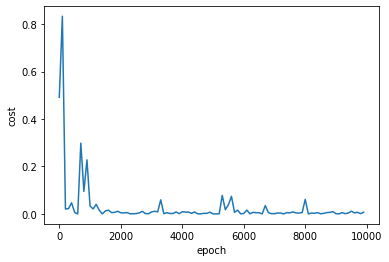

In [27]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list_sgd, cost_list_sgd)

### Predict

In [28]:
predict(2600, 4,w_sgd, b_sgd)

128.76445445876607

In [30]:
predict(1310, 3, w_sgd, b_sgd)

63.37455994814721

In [49]:
np.random.permutation(scaled_X.shape[0])

array([18, 11,  2,  3,  4, 13,  5, 16, 10, 12,  9,  0,  1, 14, 17,  8,  6,
       19,  7, 15])

## Mini Batch Gradient Descent

In [58]:
def mini_batch_gradient_descent(X, y_true, epochs, batch_size=10, learning_rate=0.01):
    number_of_features = X.shape[1]

    w = np.ones(shape=(number_of_features))
    b = 0
    cost_list = []
    epoch_list = []
    total_samples = X.shape[0]
    if batch_size > total_samples:
        batch_size = total_samples

    for i in range(epochs):
        random_index = np.random.permutation(X.shape[0])
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        for j in range(0, total_samples, batch_size):
            batch_X = sample_x[j:j+batch_size]
            batch_y = sample_y[j:j+batch_size]
            y_predicted = np.dot(w, batch_X.T) + b

            w_grad = -(2/len(batch_X))*(batch_X.T.dot(batch_y-y_predicted))
            b_grad = -(2/len(batch_X))*np.sum(batch_y-y_predicted)

            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad

            cost = np.mean(np.square(batch_y-y_predicted))

        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w, b, cost, cost_list, epoch_list


In [59]:
w_mb, b_mb, cost_mb, cost_list_mb, epoch_list_mb = mini_batch_gradient_descent(
    scaled_X,
    scaled_y.reshape(scaled_y.shape[0],),
    epochs=500,
    batch_size=10
)
w_mb, b_mb, cost_mb

(array([0.66463496, 0.60536346]), -0.17783087439280085, 0.006211711625823246)

### Plot

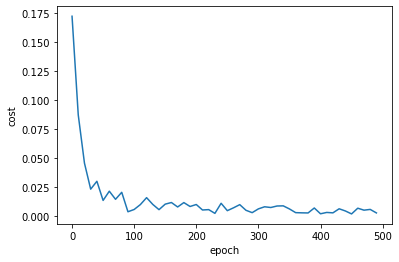

In [60]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list_mb, cost_list_mb)

### Predict

In [61]:
predict(1310, 3, w_mb, b_mb)

64.63421602919685

In [62]:
predict(2600, 4,w_mb, b_mb)

124.97770798900308